In [10]:
import sys
import os

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

sys.path.append(os.path.abspath("../src"))

from visuals.plots import *


In [11]:
omega_list = [10.0, 1.0, 0.0, -0.99, -1.0]

for omega in omega_list:
    command = f"julia ../src/sampling/main.jl --omega {omega}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 10.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:0014:04


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega10.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:08:09:17


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega1.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 0.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:1532:38


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega0.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:1140:14


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega-0.99_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:14:33:40


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega-1.0_alpha1.0.csv


In [12]:
omega10 = pd.read_csv("data/ising/Zt/N100_T10K_r100_omega10.0_alpha1.0.csv")
omega1 = pd.read_csv("data/ising/Zt/N100_T10K_r100_omega1.0_alpha1.0.csv")
omega0 = pd.read_csv("data/ising/Zt/N100_T10K_r100_omega0.0_alpha1.0.csv")
omega_099 = pd.read_csv("data/ising/Zt/N100_T10K_r100_omega-0.99_alpha1.0.csv")
omega_1 = pd.read_csv("data/ising/Zt/N100_T10K_r100_omega-1.0_alpha1.0.csv")

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([omega10['t'], omega10['Z'], omega1['Z'], omega0['Z'], omega_099['Z'], omega_1['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = ["t", "omega=10", "omega=1.0", "omega=0.0", "omega=-0.99", "omega=-1.0"]

display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([omega10['t'], omega10['std'], omega1['std'], omega0['std'], omega_099['std'], omega_1['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = ["t", "omega=10", "omega=1.0", "omega=0.0", "omega=-0.99", "omega=-1.0"]


display(std_df)


,t,omega=10,omega=1.0,omega=0.0,omega=-0.99,omega=-1.0
100,101,63.932537,63.823218,63.943285,63.796101,63.896848
101,102,62.722657,62.937757,63.303761,39.911166,63.257130
102,103,62.149615,62.679005,63.300274,39.934090,63.278011
103,104,61.661692,62.467469,63.271807,40.557872,63.297454
104,105,61.115615,62.246504,63.285720,40.577455,63.305282
...,...,...,...,...,...,...
9995,9996,0.132044,0.789016,1.625535,55.219595,93.773548
9996,9997,0.101991,0.801683,1.704351,55.589864,93.774151
9997,9998,0.114130,0.649532,1.562791,54.934241,93.775827
9998,9999,0.118977,0.706058,1.583815,54.876699,93.776372


,t,omega=10,omega=1.0,omega=0.0,omega=-0.99,omega=-1.0
100,101,0.606354,0.651185,0.665260,0.689412,0.615621
101,102,0.600737,0.608676,0.648137,0.631622,0.613733
102,103,0.624179,0.707867,0.653141,0.639552,0.609367
103,104,0.627786,0.749580,0.671427,0.660622,0.632425
104,105,0.656063,0.803611,0.695242,0.691486,0.637756
...,...,...,...,...,...,...
9995,9996,0.320754,0.710533,1.151109,6.269558,9.205418
9996,9997,0.213534,0.777223,1.136743,6.930281,9.207567
9997,9998,0.248356,0.667278,1.137552,6.654744,9.207325
9998,9999,0.245069,0.704964,1.040698,6.046214,9.207948


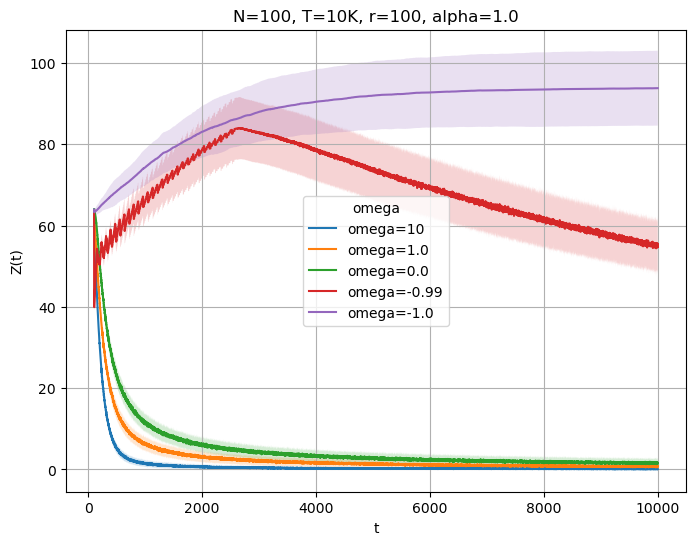

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='omega', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='omega', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    omega = column
    subset_mean = mean_df[['t', omega]]
    subset_std = std_df[['t', omega]]
    plt.fill_between(subset_mean['t'], subset_mean[omega] - subset_std[omega], subset_mean[omega] + subset_std[omega], alpha=0.2)

plt.title("N=100, T=10K, r=100, alpha=1.0")
plt.grid()
# plt.ylim(0.49, 0.71)
plt.show()


In [ ]:
omega_list = [10.0, 1.0, 0.0, -0.99, -1.0]

for omega in omega_list:
    command = f"julia ../src/sampling/main.jl --omega {omega} --alpha 0.0"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 10.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:0014:04


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega10.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:08:09:17


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega1.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 0.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:1532:38


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega0.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:1140:14


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega-0.99_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:14:33:40


Finished simulation
Saved Z values to data/ising/Zt/N100_T10K_r100_omega-1.0_alpha1.0.csv
